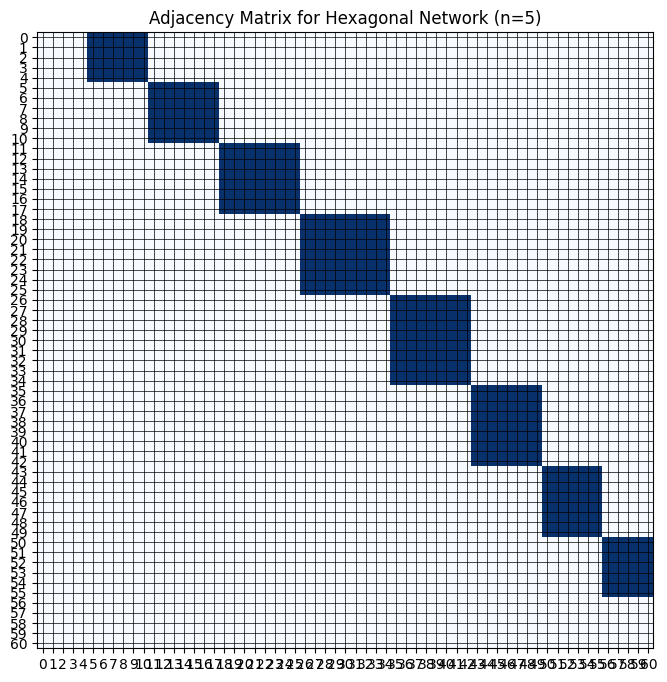

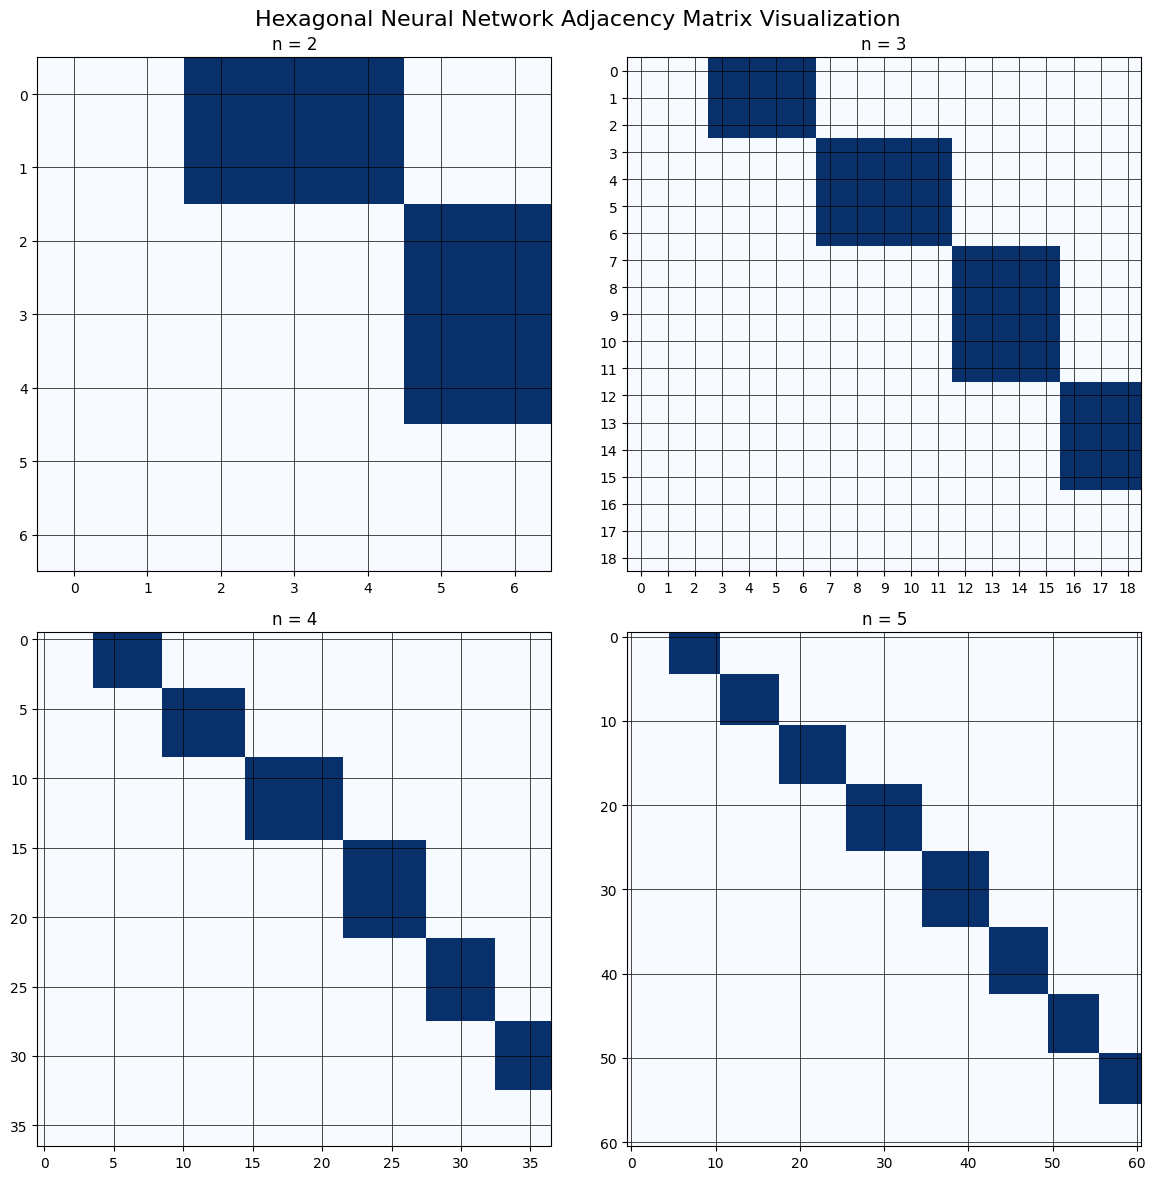

In [8]:
# Re-import required libraries after code execution environment reset
import numpy as np
import matplotlib.pyplot as plt

def get_layer_map(layer_indices, total_nodes):
    """Returns a mapping from node index to layer index."""
    node_to_layer = np.zeros(total_nodes, dtype=int)
    for layer_num, indices in enumerate(layer_indices):
        for idx in indices:
            node_to_layer[idx] = layer_num
    return node_to_layer

def build_adjacency_from_layers(layer_indices):
    """Build adjacency matrix from abstract layer definition."""
    total_nodes = sum(len(layer) for layer in layer_indices)
    A = np.zeros((total_nodes, total_nodes), dtype=int)
    for i in range(len(layer_indices) - 1):
        for u in layer_indices[i]:
            for v in layer_indices[i + 1]:
                A[u, v] = 1
    return A

def hex_layer_sizes(n):
    """Return sizes of layers for a hexagonal net with side length n."""
    return list(range(n, 2*n)) + list(range(2*n-2, n-1, -1))

def get_default_layer_indices(n):
    """Get default layered node indices for hexagon of size n."""
    sizes = hex_layer_sizes(n)
    indices = []
    start = 0
    for size in sizes:
        indices.append(list(range(start, start + size)))
        start += size
    return indices

# Generate rotated layers for n=5 manually by permuting default layers
indices_5 = get_default_layer_indices(5)
A5 = build_adjacency_from_layers(indices_5)

# Plot full adjacency matrix for n=5
plt.figure(figsize=(8, 8))
plt.imshow(A5, cmap='Blues', interpolation='none')
plt.title("Adjacency Matrix for Hexagonal Network (n=5)")
plt.xticks(np.arange(A5.shape[0]))
plt.yticks(np.arange(A5.shape[0]))
plt.grid(visible=True, color='black', linewidth=0.5)
plt.show()

# Composite image: n=2, n=3, n=4 (each in one quadrant)
A2 = build_adjacency_from_layers(get_default_layer_indices(2))
A3 = build_adjacency_from_layers(get_default_layer_indices(3))
A4 = build_adjacency_from_layers(get_default_layer_indices(4))

fig, axs = plt.subplots(2, 2, figsize=(12, 12))

axs[0, 0].imshow(A2, cmap='Blues', interpolation='none')
axs[0, 0].set_title("n = 2")
axs[0, 0].set_xticks(np.arange(A2.shape[0]))
axs[0, 0].set_yticks(np.arange(A2.shape[0]))
axs[0, 0].grid(visible=True, color='black', linewidth=0.5)

axs[0, 1].imshow(A3, cmap='Blues', interpolation='none')
axs[0, 1].set_title("n = 3")
axs[0, 1].set_xticks(np.arange(A3.shape[0]))
axs[0, 1].set_yticks(np.arange(A3.shape[0]))
axs[0, 1].grid(visible=True, color='black', linewidth=0.5)

axs[1, 0].imshow(A4, cmap='Blues', interpolation='none')
axs[1, 0].set_title("n = 4")
# axs[1, 0].set_xticks(np.arange(A4.shape[0]))
# axs[1, 0].set_yticks(np.arange(A4.shape[0]))
axs[1, 0].grid(visible=True, color='black', linewidth=0.5)

axs[1, 1].imshow(A5, cmap='Blues', interpolation='none')
axs[1, 1].set_title("n = 5")
# axs[1, 1].set_xticks(np.arange(A5.shape[0]))
# axs[1, 1].set_yticks(np.arange(A5.shape[0]))
axs[1, 1].grid(visible=True, color='black', linewidth=0.5)

# axs[1, 1].axis('off')
# axs[1, 1].text(0.5, 0.5, "Hexagonal Neural Net Adjacency\nTop Left: n=2, Top Right: n=3\nBottom Left: n=4",
#                ha='center', va='center', fontsize=14, wrap=True)

plt.suptitle("Hexagonal Neural Network Adjacency Matrix Visualization", fontsize=16)
plt.tight_layout()
plt.show()
